# Logistic Regression for handwritten digit classification_Problem 5.4_Hw5_CSE 250A_Fall 2022

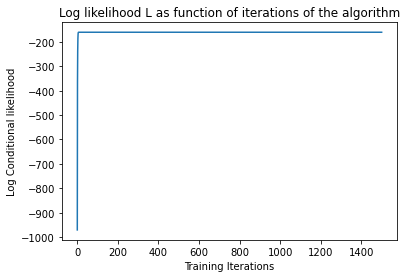

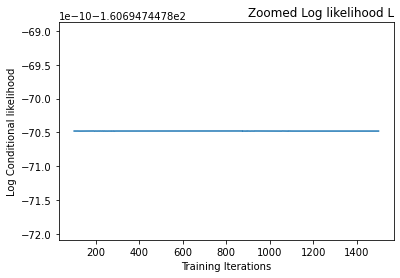

The final stabilized, maximized value of Log likelihood is :-160.6947447870481 



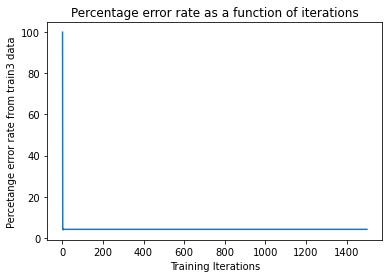

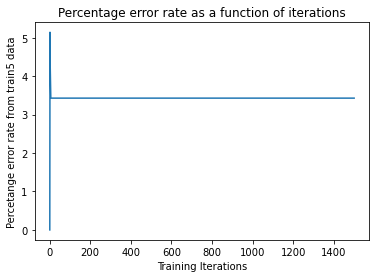

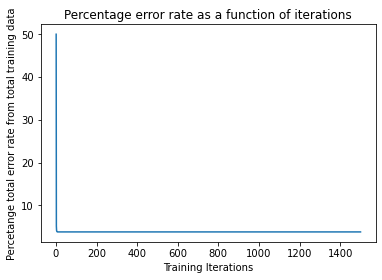

The final percentage error rate from train3 data=4.142857142857148% 

The final percentage error rate from train5 data=3.4285714285714253% 

The final percentage error rate from total training data=3.785714285714281% 

The final weight vector w, printed as a 8 X 8 matrix: 

[[-0.69867127 -1.79091575 -1.09584693 -1.55932126 -0.61277599 -1.19602757
   0.80498596  1.98171976]
 [-0.3070206  -0.27517389  0.33732158 -0.03484072 -0.70239384  1.00821882
  -1.50068516 -1.51410942]
 [ 4.53841604  1.39877779  1.62987333  0.09538517  1.03756464 -2.47948388
  -2.46695749 -2.94565932]
 [ 0.75360325  0.36371168  0.79407304 -0.36564767 -0.53238143 -2.81308121
   0.5335138  -0.06480436]
 [ 0.6671663   1.33479468  0.11239958 -0.48311693 -0.63105516 -0.03001328
  -0.67690004 -0.06046559]
 [ 1.3431295  -0.30006869 -0.45791014 -0.22792613 -0.05459433 -1.17047615
   1.03809757 -1.8978986 ]
 [ 1.75984949 -0.78118549  1.42577195  0.74181376  0.54108415 -0.47609333
   0.12111255 -1.76659023]
 [ 0.746778    0.3

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

def intlistconvert(strlist):    #function to convert a character list to an integer list, if applicable 
    intlist=[int(stringel) for stringel in strlist]
    return intlist

############## convention: y_t=0 for each training data corresponding to 3 and y_t=1 for each training data corresponding to 5  

########################### part a solution #########################################################
###########reading train3.txt file
train3list=[]
with open('train3.txt') as f:
    for line in f:
        train3list.append(list(line.strip().replace(" ", "")))    # takes input as a list of integers removing all the spaces 

#print(train3list)
train3list=[intlistconvert(el) for el in train3list]  # converts the list of list of charcaters to that of integers
train3data=np.array(train3list)   # converts the list to a numpy array
lentrain3=len(train3data)
#print(train3data)

##########reading train5.txt file
train5list=[]
with open('train5.txt') as f:
    for line in f:
        train5list.append(list(line.strip().replace(" ", "")))    # takes input as a list of integers removing all the spaces 

#print(train5list)
train5list=[intlistconvert(el) for el in train5list]  # converts the list of list of charcaters to that of integers
train5data=np.array(train5list)   # converts the list to a numpy array
lentrain5=len(train5data)
#print(train5data)


lenimage=len(train5data[1,:])   # length of each bitmap image vector 


###### start of the newton's method
def sig(w,x):    # claculates sigmoid function of dot product of two vectors w and x
    z=np.dot(w,x)
    s=1/(1 + np.exp(-z))
    return s


def gradcalc(w):   # calculates gradient for each given w with our training list data
    grad=np.zeros(lenimage, dtype=float)
    for t in range(lentrain3+lentrain5):
        if t<=lentrain3-1 :
            grad=np.add(grad,-sig(w,train3data[t,:])*train3data[t,:])    #y_t = 0 here as we are in train3
        else:
            t1=t-lentrain3
            grad=np.add(grad,(1-sig(w,train5data[t1,:]))*train5data[t1,:])    #y_t = 1 here as we are in train5

    return grad

def hesscalc(w):  # calculates hessian for each given w with our training list data
    hess=np.zeros((lenimage,lenimage),dtype=float)
    for t in range(lentrain3+lentrain5):
        if t<=lentrain3-1:
            x = np.reshape(train3data[t,:] , (64,1))
            mat=np.matmul(x , np.transpose(x))
            hess=np.subtract(hess,np.dot(sig(w,train3data[t,:])*sig(-w,train3data[t,:]),mat))
        else:
            t1=t-lentrain3
            x = np.reshape(train5data[t1, :] , (64,1))
            mat=np.matmul(x , np.transpose(x))
            hess=np.subtract(hess,np.dot(sig(w,train5data[t1,:])*sig(-w,train5data[t1,:]),mat))

    return hess

def countaccepted3(w):   # for a given vector w, it counts the number of accepted data in training set 3
    c3=0
    for t in range(lentrain3):
        py1xt=sig(w,train3data[t,:])
        if py1xt < 0.5:
            c3=c3+1
    return c3
    
    
def countaccepted5(w):   # for a given vector w, it counts the number of accepted data in training set 5
    c5=0
    for t in range(lentrain5):
        py1xt=sig(w,train5data[t,:])
        if py1xt >= 0.5:
            c5=c5+1
    return c5
    
    
def likelihood(w):       # for a given vector w, it calculates the log-likelihood
    L=0
    for t in range(lentrain3+lentrain5):
        if t<=lentrain3-1:
            L=L+ np.log(sig(-w,train3data[t,:]))  #y_t = 0 here as we are in train3
        else:
            t1=t-lentrain3
            L=L+np.log(sig(w,train5data[t1,:]))  #y_t = 1 here as we are in train5
    return L
        

# lists for calculating errors and Log-likelihood
Ltrain=[]
err5datatrainper=[]
err3datatrainper=[]
errdatatrainper=[]
itercount=[]
itera=0    
    
    
w=np.zeros(lenimage, dtype=float)   # starting value of w is 0 vector as instructed in lecture
dL=gradcalc(w)   # dL denotes the gradient of log conditional likelihood
H=hesscalc(w)  # taking an invertible matrix (Say identity) for initiation

while((np.linalg.norm(dL)>pow(10,-14)) and (itera < 1500)):
    # iteration count
    itera=itera+1
    itercount.append(itera)
    
    # percentage error count for train 3 data
    c3=countaccepted3(w)
    err3datatrainper.append(100*(1-c3/lentrain3))
    
    # percentage error count for train 5 data
    c5=countaccepted5(w)
    err5datatrainper.append(100*(1-c5/lentrain5))
    
    # percentage error count for total training data
    errdatatrainper.append(100*(1-(c3+c5)/(lentrain3+lentrain5)))
    
    # likelihood calculation 
    Ltrain.append(likelihood(w))
    # update steps
    w=np.subtract(w,np.matmul(np.linalg.inv(H),dL))
    H=hesscalc(w)
    dL=gradcalc(w)

    
# plot of log-likelihood with iterations
plt.title(f"Log likelihood L as function of iterations of the algorithm") 
plt.xlabel(f"Training Iterations") 
plt.ylabel(f"Log Conditional likelihood") 
plt.plot(itercount,Ltrain)
plt.show()
    
plt.title(f"Zoomed Log likelihood L",loc='right') 
plt.xlabel(f"Training Iterations") 
plt.ylabel(f"Log Conditional likelihood") 
plt.plot(itercount[100:],Ltrain[100:])
plt.show()


# printing final value of Log likelihood:

print(f"The final stabilized, maximized value of Log likelihood is :{Ltrain[-1]} \n")

# plot of error rates with iterations
plt.title(f"Percentage error rate as a function of iterations") 
plt.xlabel(f"Training Iterations") 
plt.ylabel(f"Percetange error rate from train3 data") 
plt.plot(itercount,err3datatrainper)
plt.show()
 
    
plt.title(f"Percentage error rate as a function of iterations") 
plt.xlabel(f"Training Iterations") 
plt.ylabel(f"Percetange error rate from train5 data") 
plt.plot(itercount,err5datatrainper)
plt.show()

plt.title(f"Percentage error rate as a function of iterations") 
plt.xlabel(f"Training Iterations") 
plt.ylabel(f"Percetange total error rate from total training data") 
plt.plot(itercount,errdatatrainper)
plt.show()


print(f"The final percentage error rate from train3 data={err3datatrainper[-1]}% \n")
print(f"The final percentage error rate from train5 data={err5datatrainper[-1]}% \n")
print(f"The final percentage error rate from total training data={errdatatrainper[-1]}% \n")


# printing the final weight vector w as a 8 cross 8 matrix: wmat[i,j]=w(8i+j)  # with Python matrix indices 
wmat=np.zeros((8,8))
print(f"The final weight vector w, printed as a 8 X 8 matrix: \n")
for i in range(8):
    for j in range(8):
        wmat[i,j]=w[8*i+j]
print(wmat)   # this w is obtained 'after' the last execution of the entire while loop above but it is 'very close' to the w before it


In [8]:
######################here we take the final vector w from the part above and work with it for the test data

########################### part b solution #########################################################

#print(w)
###########reading test3.txt file
test3list=[]
with open('test3.txt') as f:
    for line in f:
        test3list.append(list(line.strip().replace(" ", "")))    # takes input as a list of integers removing all the spaces 

#print(test3list)
test3list=[intlistconvert(el) for el in test3list]  # converts the list of list of charcaters to that of integers
test3data=np.array(test3list)   # converts the list to a numpy array
lentest3=len(test3data)
#print(test3data)

##########reading test5.txt file
test5list=[]
with open('test5.txt') as f:
    for line in f:
        test5list.append(list(line.strip().replace(" ", "")))    # takes input as a list of integers removing all the spaces 

#print(test5list)
test5list=[intlistconvert(el) for el in test5list]  # converts the list of list of charcaters to that of integers
test5data=np.array(test5list)   # converts the list to a numpy array
lentest5=len(test5data)
#print(test5data)


def countaccepted3(w):   # for a given vector w, it counts the number of accepted data in training set 3
    c3=0
    for t in range(lentest3):
        py1xt=sig(w,test3data[t,:])
        if py1xt < 0.5:
            c3=c3+1
    return c3

def countaccepted5(w):   # for a given vector w, it counts the number of accepted data in training set 5
    c5=0
    for t in range(lentest5):
        py1xt=sig(w,test5data[t,:])
        if py1xt >= 0.5:
            c5=c5+1
    return c5


# percentage error count for train 3 data
c3=countaccepted3(w)
err3datatestper=100*(1-c3/lentest3)
    
# percentage error count for train 5 data
c5=countaccepted5(w)
err5datatestper=100*(1-c5/lentest5)
    
# percentage error count for total training data
errdatatestper=100*(1-(c3+c5)/(lentest3+lentest5))

print(f"The percentage error rate from test3 data={err3datatestper}% \n")

print(f"The percentage error rate from test5 data={err5datatestper}% \n")

print(f"The percentage error rate from total test data={errdatatestper}% \n")

The percentage error rate from test3 data=7.499999999999996% 

The percentage error rate from test5 data=5.75% 

The percentage error rate from total test data=6.6250000000000036% 

